In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data = "D:\Intern\Data Science\Intern_Project\Train"

In [3]:
os.listdir(train_data)

['conditioning excercise', 'Sports']

In [6]:
TRAINING_DATA = tf.keras.utils.image_dataset_from_directory(train_data)

Found 4105 files belonging to 2 classes.


In [7]:
data_iterator = TRAINING_DATA.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

In [9]:
batch[0].shape

(32, 256, 256, 3)

In [12]:
batch[1]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
TRAINING_DATA = TRAINING_DATA.map(lambda x,y:(x/255,y))

In [15]:
scaled_iterator = TRAINING_DATA.as_numpy_iterator()

In [16]:
batch = scaled_iterator.next()

In [17]:
batch[0].max()

1.0

In [18]:
batch[0].min()

0.0

In [19]:
len(TRAINING_DATA)

129

In [21]:
train_size = int(len(TRAINING_DATA)*0.8)
val_size = int(len(TRAINING_DATA)*0.2) + 1
print(train_size)
print(val_size)

103
26


In [22]:
train = TRAINING_DATA.take(train_size)
val = TRAINING_DATA.skip(train_size).take(val_size)

In [23]:
len(train)

103

In [24]:
len(val)

26

In [55]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [56]:
model = Sequential()

In [57]:
model.add(Conv2D(16, (3,3),1,activation = 'relu',input_shape=(256,256,3)))

model.add(MaxPooling2D())



model.add(Conv2D(32, (3,3), 1, activation = 'relu'))

model.add(MaxPooling2D())



model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())



model.add(Flatten())



model.add(Dense (256, activation='relu'))

model.add(Dense (1, activation='sigmoid'))


In [58]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics= ['accuracy'])

In [60]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 30, 30, 16)      

In [61]:
logdir = "D:\Intern\Data Science\Intern_Project\logs"

In [62]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [63]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
103/103 [==============================] - 65s 616ms/step - loss: 0.6015 - accuracy: 0.6993 - val_loss: 0.5413 - val_accuracy: 0.7318
Epoch 2/20
103/103 [==============================] - 67s 646ms/step - loss: 0.4890 - accuracy: 0.7615 - val_loss: 0.5282 - val_accuracy: 0.7540
Epoch 3/20
103/103 [==============================] - 68s 657ms/step - loss: 0.3759 - accuracy: 0.8298 - val_loss: 0.4300 - val_accuracy: 0.8133
Epoch 4/20
103/103 [==============================] - 81s 782ms/step - loss: 0.2708 - accuracy: 0.8887 - val_loss: 0.3935 - val_accuracy: 0.8331
Epoch 5/20
103/103 [==============================] - 82s 783ms/step - loss: 0.1728 - accuracy: 0.9357 - val_loss: 0.4225 - val_accuracy: 0.8566
Epoch 6/20
103/103 [==============================] - 74s 714ms/step - loss: 0.0969 - accuracy: 0.9639 - val_loss: 0.4951 - val_accuracy: 0.8529
Epoch 7/20
103/103 [==============================] - 79s 759ms/step - loss: 0.0537 - accuracy: 0.9836 - val_loss: 0.5635 - val_ac

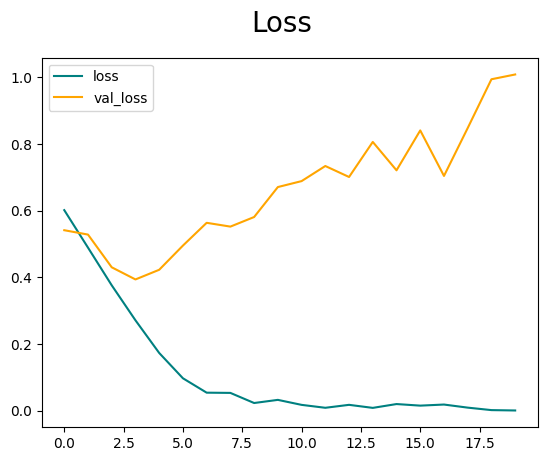

In [64]:
fig = plt.figure()

plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)

plt.legend(loc="upper left")

plt.show()